# Hotel Booking Data Science Project

## Hotel Booking Data Exploration & Preprocessing:

### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report



### Data Loading

In [2]:
sns.set(style="whitegrid")

data_path = "../data/raw/hotel_booking.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData Summary:")
display(df.info())

Dataset shape: (119390, 36)

First 5 rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498



Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  m

None

In [3]:
duplicate_rows_count = df.duplicated().sum()
if duplicate_rows_count != 0:
    print("\nNumber of Duplicate Rows:", duplicate_rows_count)
else:
    print("\nNo Duplicate Rows found.")


No Duplicate Rows found.


In [4]:
missing_values = df.isnull().sum()
non_zero_missing = missing_values[missing_values != 0]

print("Columns with Missing Values (non-zero count):")
print(non_zero_missing)

Columns with Missing Values (non-zero count):
children         4
country        488
agent        16340
company     112593
dtype: int64


In [5]:
columns_to_investigate = ['children', 'country', 'agent', 'company']

for col in columns_to_investigate:
    # Drop NaN values for the unique counts
    unique_values = df[col].dropna().unique()
    unique_count = df[col].nunique(dropna=True)
    print(f"Column '{col}' has {unique_count} distinct values (excluding NaN).")
    # Print a sample of up to 10 distinct values for reference
    print(f"Sample values from '{col}':", unique_values[:10])
    print("-" * 50)

Column 'children' has 5 distinct values (excluding NaN).
Sample values from 'children': [ 0.  1.  2. 10.  3.]
--------------------------------------------------
Column 'country' has 177 distinct values (excluding NaN).
Sample values from 'country': ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG']
--------------------------------------------------
Column 'agent' has 333 distinct values (excluding NaN).
Sample values from 'agent': [304. 240. 303.  15. 241.   8. 250. 115.   5. 175.]
--------------------------------------------------
Column 'company' has 352 distinct values (excluding NaN).
Sample values from 'company': [110. 113. 270. 178. 240. 154. 144. 307. 268.  59.]
--------------------------------------------------


children:

It has a very small number of distinct values.

Action: Since this is a numeric column representing the number of children, and missing values likely indicate zero children, we will replace missing values with 0.

country, agent and company:

All 3 categorical columns have a high number of distinct values (more than 177) and a lot missing values.

This level of granularity is likely too high for effective modeling, as it could increase noise and lead to overfitting.

Action: These columns should be dropped from further analysis.

In [6]:
df['children'].fillna(0, inplace=True)

df.drop(columns=['country','agent', 'company'], inplace=True)

In [7]:
missing_values = df.isnull().sum()
non_zero_missing = missing_values[missing_values != 0]

print("Columns with Missing Values (non-zero count):")
print(non_zero_missing)

Columns with Missing Values (non-zero count):
Series([], dtype: int64)


In [8]:
# These columns are artificially created and are not useful for analysis

cols_to_drop = ["name", "email", "phone-number", "credit_card"]
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
print("\nColumns after dropping unneeded ones:")
print(df.columns.tolist())


Columns after dropping unneeded ones:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [9]:
# - 'reserved_room_type' and 'assigned_room_type': Codes provided for anonymity, not valuable for the analysis.

cols_to_drop = ['reserved_room_type', 'assigned_room_type']

# Drop these columns (errors='ignore' ensures that if any column does not exist, it will be skipped)
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
# Drop the 'market_segment' column as it provides redundant information compared to 'distribution_channel'
df.drop(columns=["market_segment"], inplace=True)

# Drop the reservation status columns as they are redundant for the cancellation prediction task
cols_to_drop = ["reservation_status", "reservation_status_date"]
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)

# arrival_date_year will not help us, as we want to predict for future points
df.drop(columns=["arrival_date_year"], inplace=True)

print("Columns remaining after dropping:")
print(df.columns.tolist())

Columns remaining after dropping:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [10]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [11]:
print("Numerical Columns:")
print(num_cols)
print("\nCategorical Columns:")
print(cat_cols)

Numerical Columns:
['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

Categorical Columns:
['hotel', 'arrival_date_month', 'meal', 'distribution_channel', 'deposit_type', 'customer_type']


Our dataset is cleaned and ready to go for the Explanatory Data Analysis.

### Explanatory Data Analysis (EDA):

In [12]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nSummary Statistics for Numerical Variables:")
display(df.describe())

print("\nSummary Statistics for Categorical Variables:")
display(df.describe(include=['object']))

Dataset Shape: (119390, 23)

First 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,0,0,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,0,0,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,0,0,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,0,0,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,0,0,0,No Deposit,0,Transient,98.0,0,1



Summary Statistics for Numerical Variables:


,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000



Summary Statistics for Categorical Variables:


,hotel,arrival_date_month,meal,distribution_channel,deposit_type,customer_type
count,119390,119390,119390,119390,119390,119390
unique,2,12,5,5,3,4
top,City Hotel,August,BB,TA/TO,No Deposit,Transient
freq,79330,13877,92310,97870,104641,89613


### Numeric Columns Statistics

is_canceled:

Mean ≈ 0.37
About 37% of bookings are canceled, indicating that cancellations are fairly common.

lead_time:

Mean ≈ 104 days
On average, bookings are made about 104 days before the arrival date—even though the median (69 days) suggests many bookings are made closer to arrival.

arrival_date_week_number:

Mean ≈ 27.17
Bookings tend to average around week 27 of the year, though the range is wide (min 1, max 53).

arrival_date_day_of_month:

Mean ≈ 15.80
The average arrival day is mid-month, around day 16.

stays_in_weekend_nights:

Mean ≈ 0.93
On average, bookings include nearly 1 weekend night.

stays_in_week_nights:

Mean ≈ 2.50
Bookings include roughly 2.5 week nights on average, which together with weekend stays suggests a total stay of around 3 to 4 nights.

adults:

Mean ≈ 1.86
The typical booking includes about 2 adults.

children:

Mean ≈ 0.10
Very few bookings include children; most bookings have no children.

babies:

Mean ≈ 0.008
Almost negligible presence of babies in bookings.

is_repeated_guest:

Mean ≈ 0.032
Only about 3.2% of bookings are from repeat guests, highlighting that the vast majority are first-time bookings.

previous_cancellations:

Mean ≈ 0.087
On average, guests have a low history of cancellations prior to the current booking.

previous_bookings_not_canceled:

Mean ≈ 0.137
This suggests that on average, guests have relatively few past successful bookings before the current one.

booking_changes:

Mean ≈ 0.22
There is minimal amendment activity per booking, indicating that changes are relatively rare.

days_in_waiting_list:

Mean ≈ 2.32
While the average days on the waiting list is about 2.3, the median is 0 (not shown here), implying that most bookings are confirmed immediately, with some outliers that stayed on the waiting list much longer.

adr (Average Daily Rate):

Mean ≈ 101.83
On average, the revenue per room per day is around 102 (currency units). Note that the maximum is very high (5400) which might suggest some outliers or special cases.

required_car_parking_spaces:

Mean ≈ 0.063
Almost all bookings do not require a car parking space.

total_of_special_requests:

Mean ≈ 0.57
On average, bookings have fewer than 1 special request, indicating relatively few additional demands from guests.

### Categorical Columns Statistics

### hotel:

Unique: 2 unique values (City Hotel and Resort Hotel).

Top: "City Hotel" is the most frequent, occurring 79,330 times.

The dataset contains bookings from two types of hotels, with City Hotel dominating the records.

### arrival_date_month:

Unique: 12 unique values (one for each month).

Top: "August" appears most frequently (13,877 bookings).

Bookings are spread across all months, but August stands out as the month with the highest frequency which is logical (people tend to have their vacation on August).

### meal:

Unique: 5 unique meal plans.

Top: "BB" (Bed & Breakfast) is the most common option, with 92,310 occurrences.

The majority of bookings are made with the Bed & Breakfast meal option, indicating its popularity among guests.

### distribution_channel:

Unique: 5 unique distribution channels.

Top: "TA/TO" is the most frequent channel with 97,870 bookings.

Most bookings come via Travel Agents or Tour Operators, suggesting that this channel is the dominant booking route for the dataset.

### deposit_type:

Unique: 3 unique deposit types are recorded.

Top: "No Deposit" is the most common, appearing in 104,641 bookings.

The overwhelming majority of bookings require no deposit, which could be indicative of the hotel policies or booking trends in the dataset.

### customer_type:

Unique: 4 unique customer types are identified.

Top: "Transient" is the most frequent with 89,613 occurrences.

Most of the bookings come from transient customers, suggesting that one-time or short-stay guests are the primary market segment.

We chose is_canceled as our target because predicting booking cancellations can greatly benefit hotel management. By identifying customers likely to cancel, especially those with expensive bookings, hotels can proactively implement strategies such as requiring deposits or adjusting pricing to secure revenue. This predictive insight not only helps optimize inventory and staffing but also enhances customer segmentation, leading to more informed business decisions and improved profitability.

In [13]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

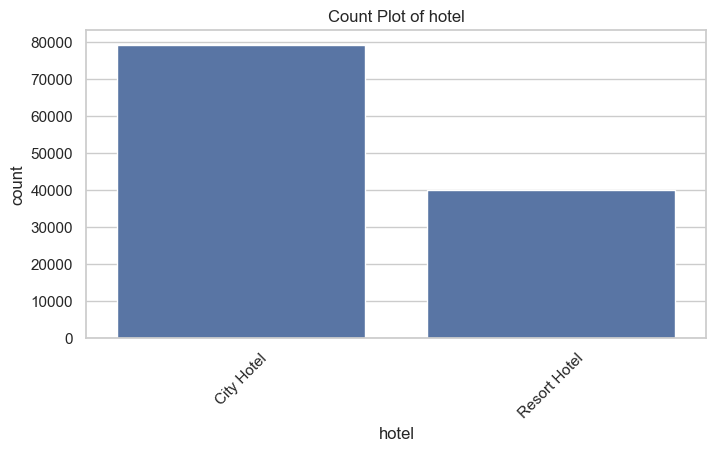

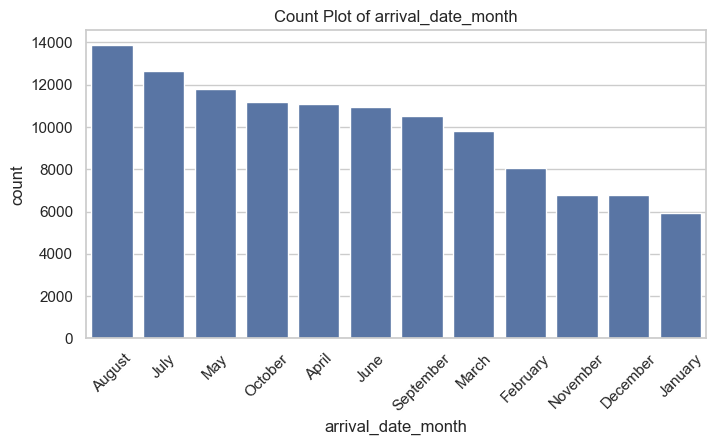

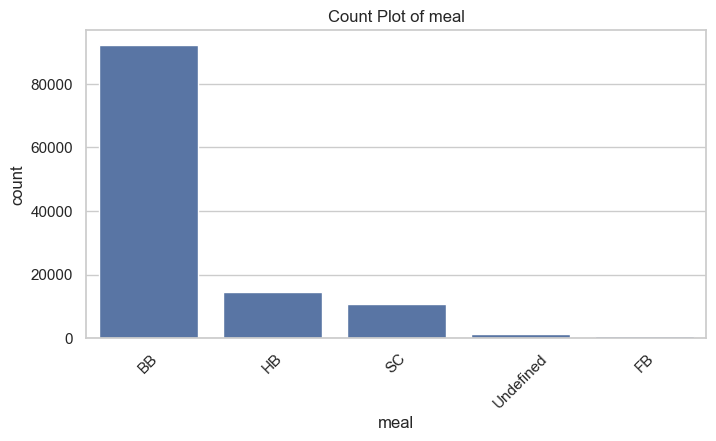

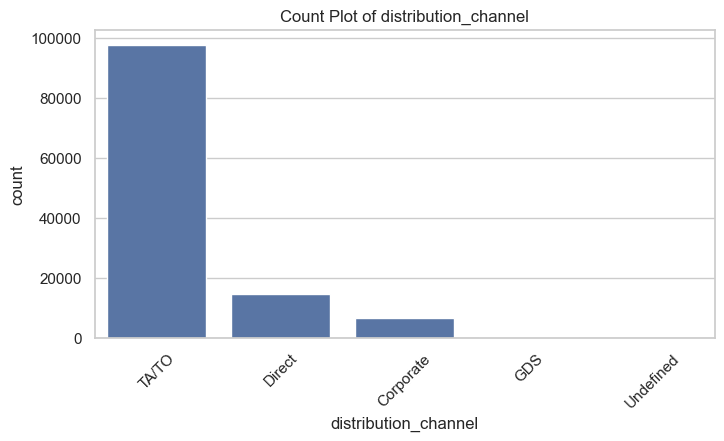

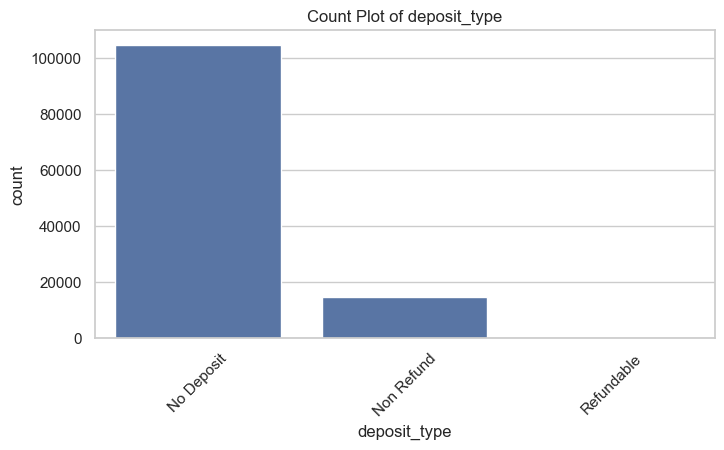

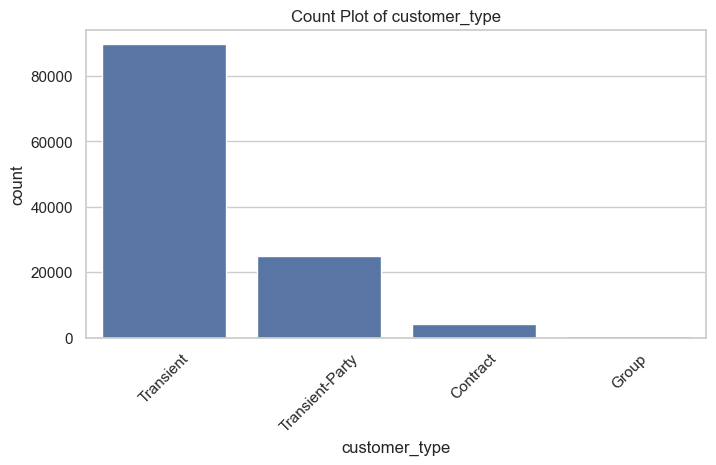

In [14]:
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        order = df[col].value_counts().index  # for sorted bars
        sns.countplot(data=df, x=col, order=order)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.show()

While examining the meal plan data, it’s evident that "BB" (Bed & Breakfast) is the most popular option, which likely reflects its convenience and widespread availability rather than any unique influence on cancellation behavior. In our dataset, the high frequency of BB bookings is expected and does not necessarily imply that choosing BB leads to a higher cancellation probability. Therefore, using the meal plan as a decisive predictor for cancellations might lead to incorrect conclusions.

hotel:
City Hotel is the dominant category, which suggests that most bookings are for urban accommodations. This distinction may be useful when analyzing cancellation trends by property type.

arrival_date_month:
There are 12 unique months, representing the full calendar. August is the most frequent month for arrivals. This seasonal trend might correlate with peak tourism periods, but the month itself isn’t necessarily a strong predictor of cancellations unless combined with other factors like seasonality or demand.

distribution_channel:
With five distribution channels available, "TA/TO" (Travel Agents/Tour Operators) is the dominant channel. This may indicate that most bookings are made through intermediaries, which could be a relevant factor in cancellation patterns, especially if commissions or booking policies differ across channels.

deposit_type:
There are three deposit types in the data, with "No Deposit" being the most common by a large margin. This suggests that most customers are not required to pay a deposit upfront, an insight that might relate to cancellation behavior,hotels may need to reconsider deposit policies if cancellations result in revenue loss.

customer_type:
Four customer types are present, with "Transient" being the most frequent. This indicates that the majority of bookings are made by one-time or short-stay guests rather than group or repeated customers. The transient nature of the majority of customers might be linked to higher cancellation rates, as repeat customers typically have a stronger commitment.

In [15]:
df.drop(columns=['meal'], inplace=True)

print("Remaining categorical columns:")
print(df.select_dtypes(include=["object"]).columns.tolist())

Remaining categorical columns:
['hotel', 'arrival_date_month', 'distribution_channel', 'deposit_type', 'customer_type']


Now, we will perform one-hot encoding for our categorical variables, so it can be used as input for the machine learning algorithms.

In [16]:
categorical_cols = ['hotel', 'arrival_date_month', 'distribution_channel', 'deposit_type', 'customer_type']

# Perform one-hot encoding on these columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the new shape and the resulting columns after encoding
print("Shape after one-hot encoding:", df_encoded.shape)
print("Columns after encoding:")
print(df_encoded.columns.tolist())

Shape after one-hot encoding: (119390, 38)
Columns after encoding:
['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'c

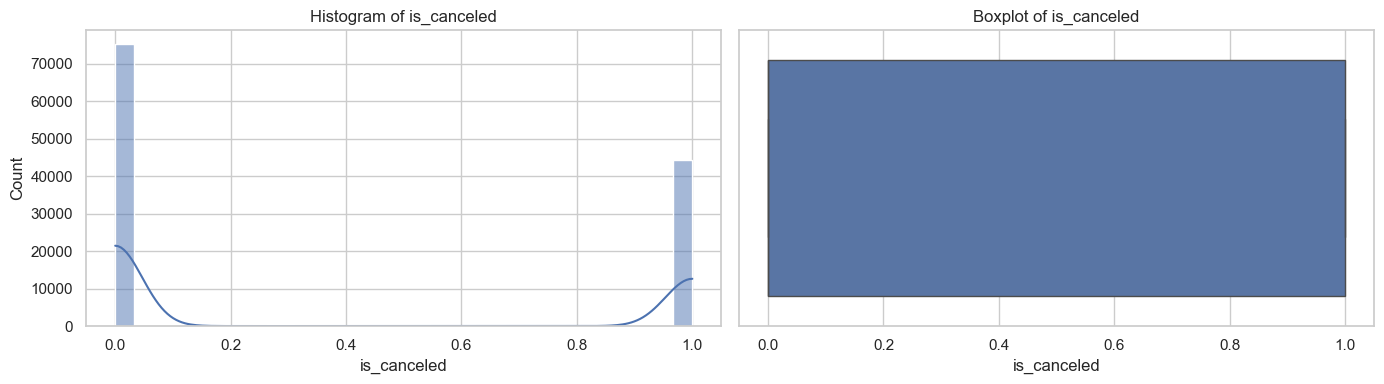

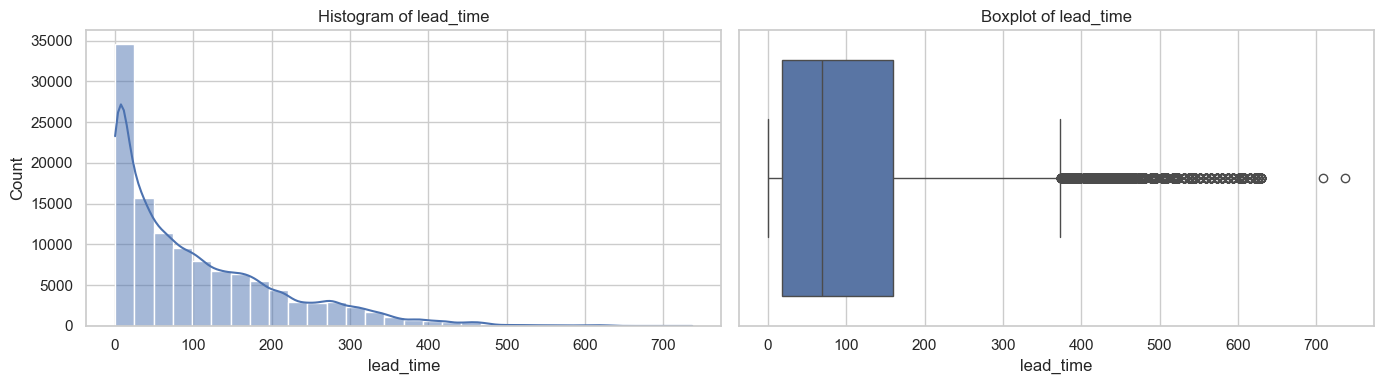

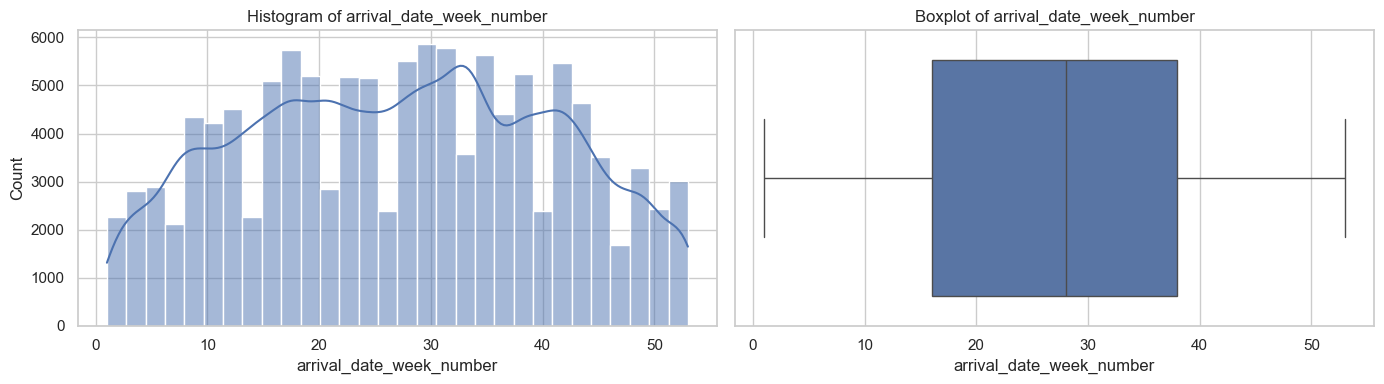

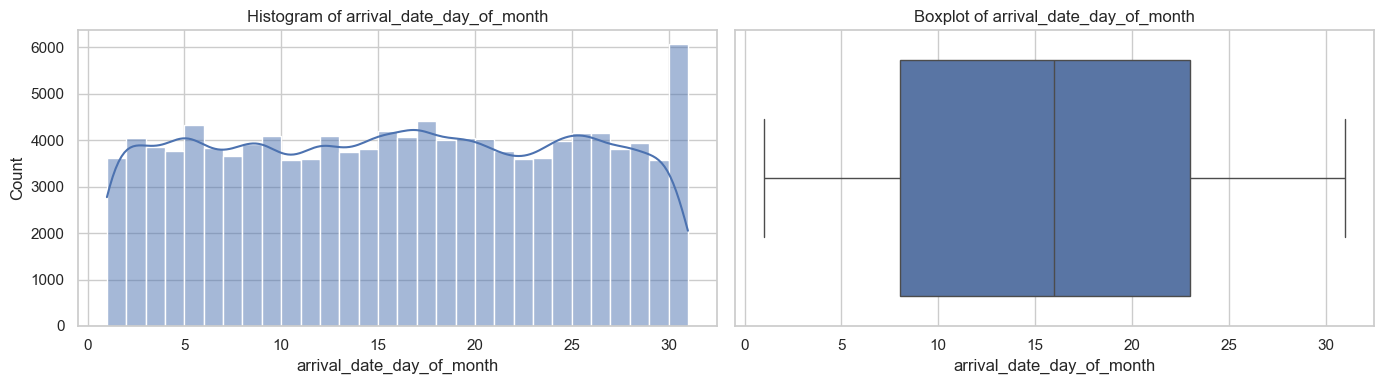

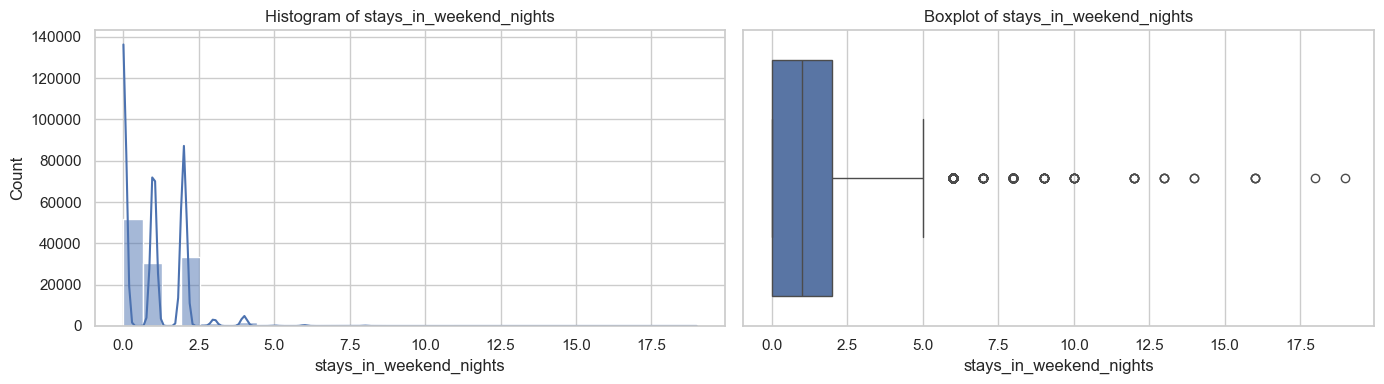

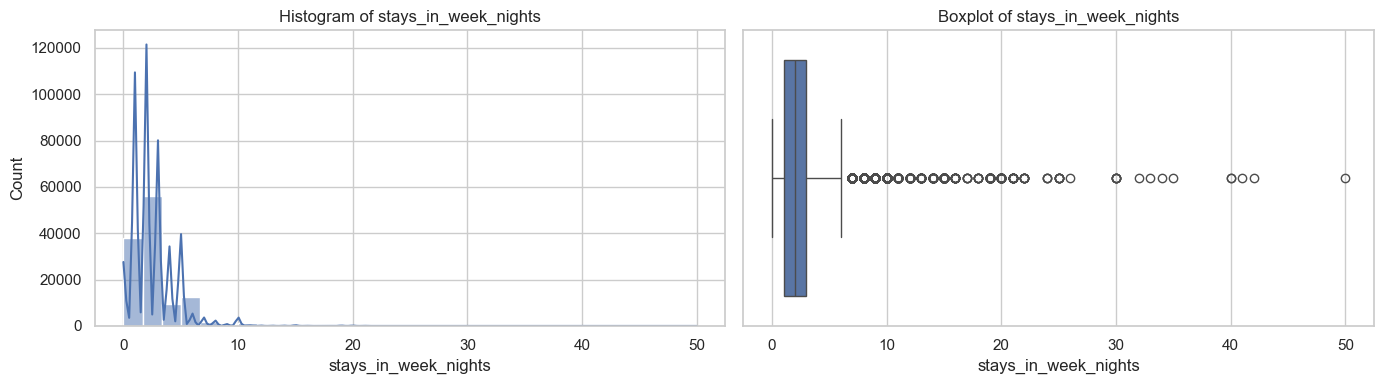

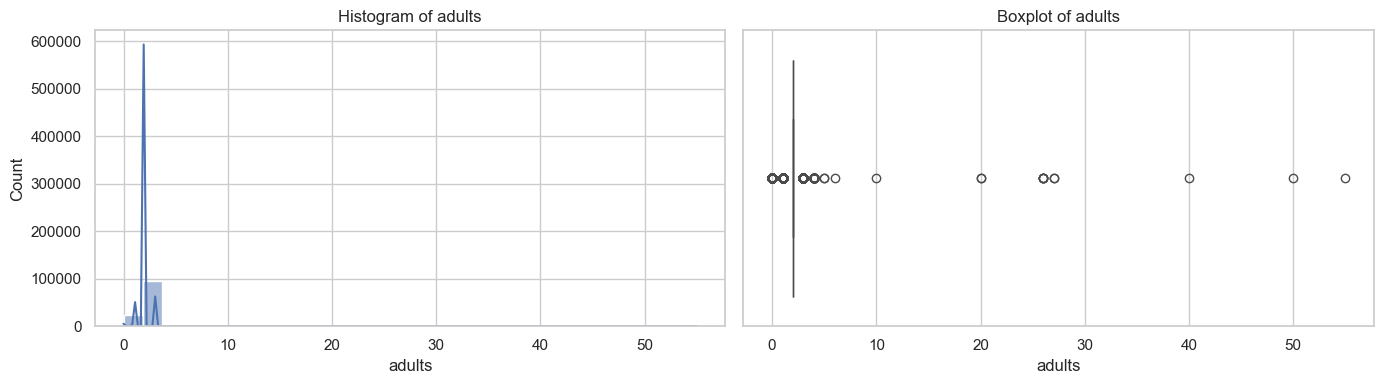

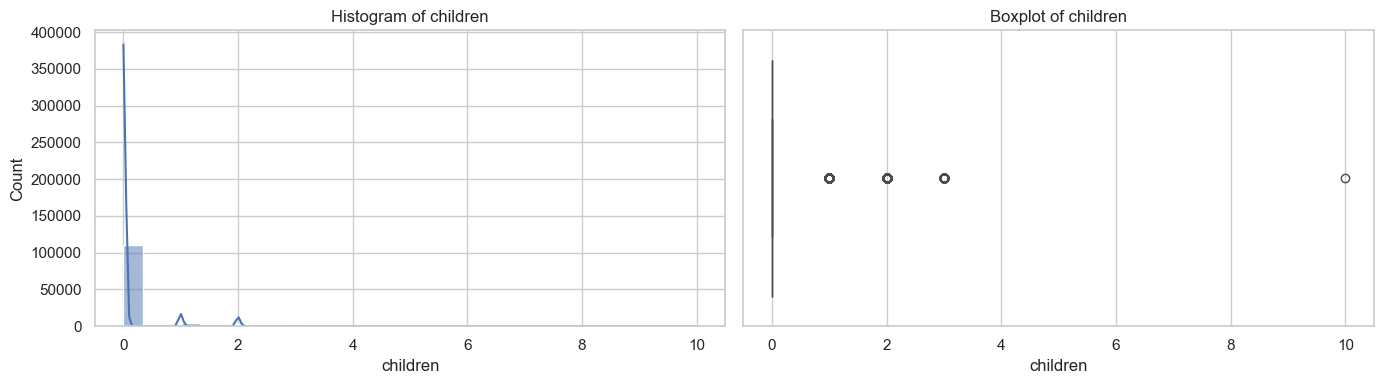

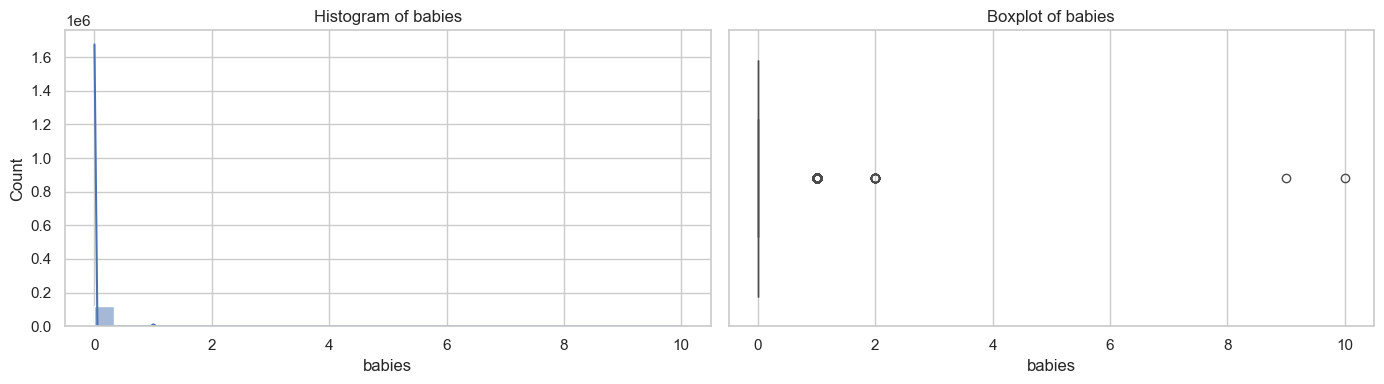

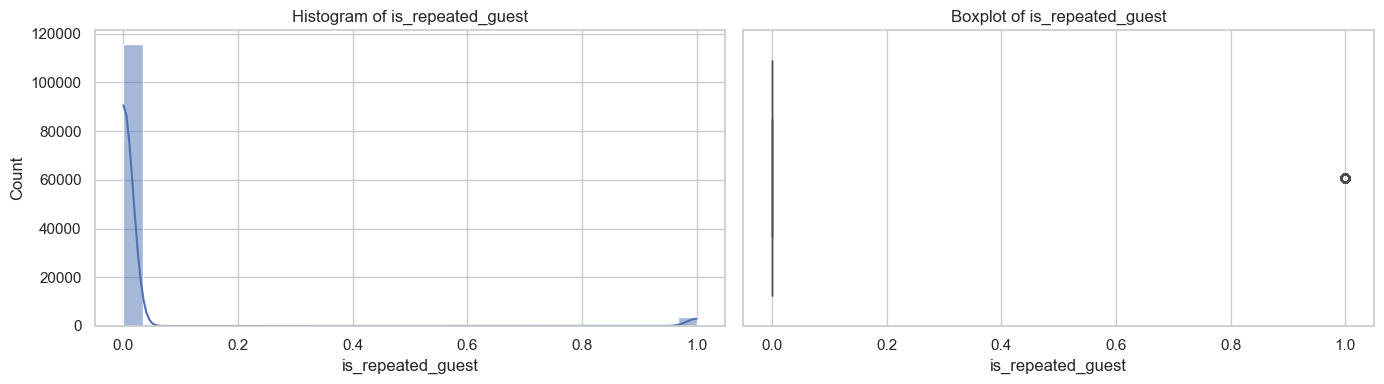

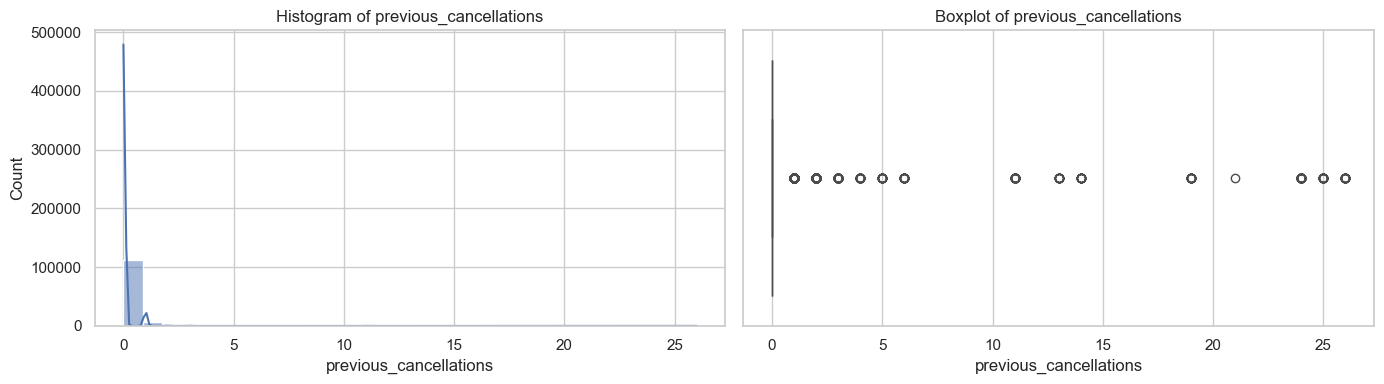

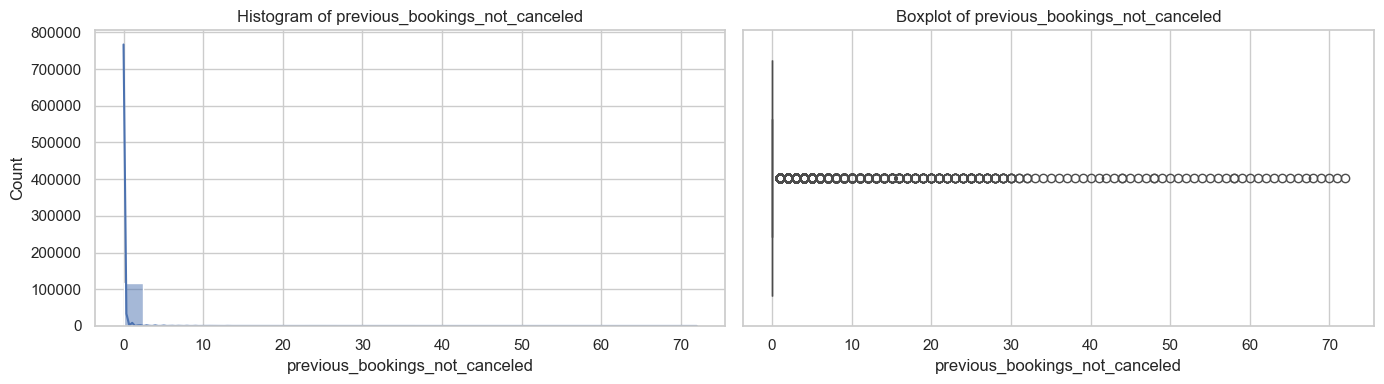

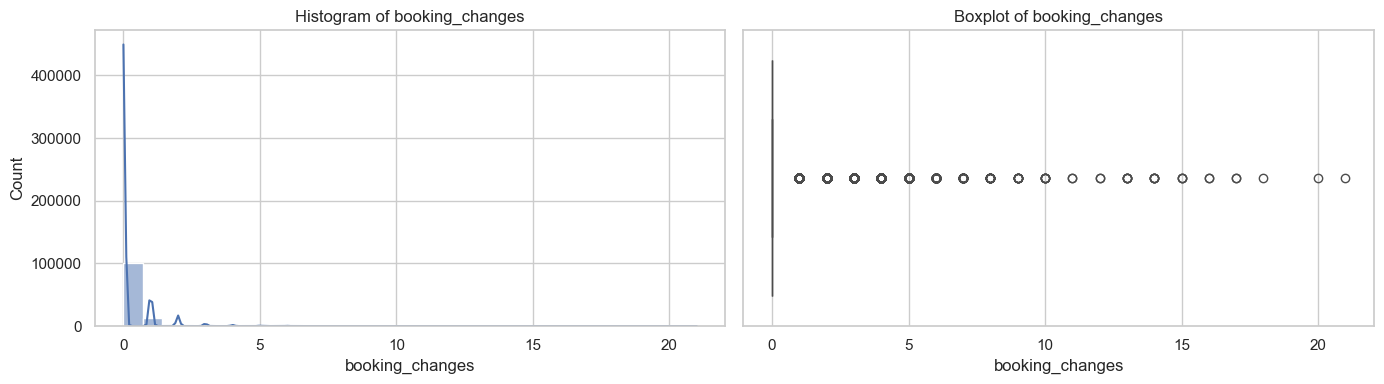

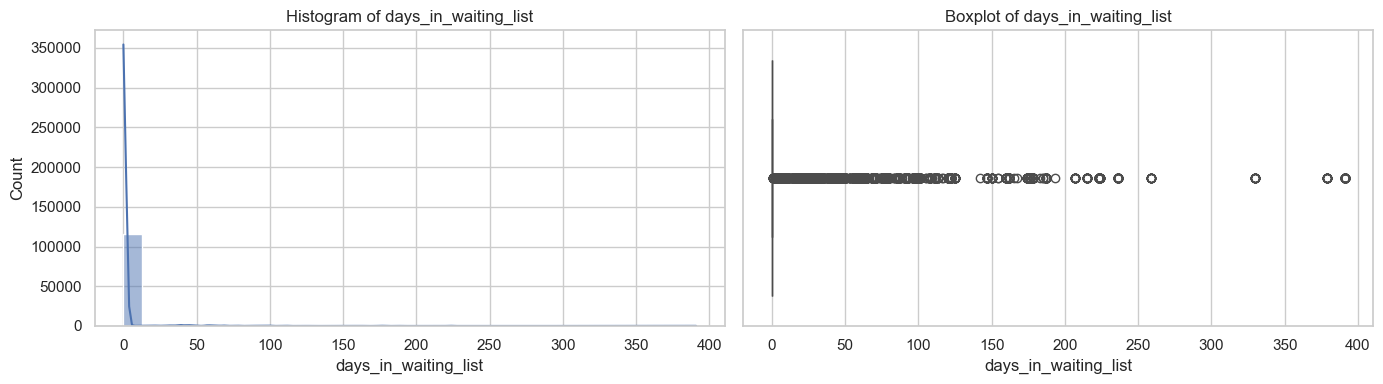

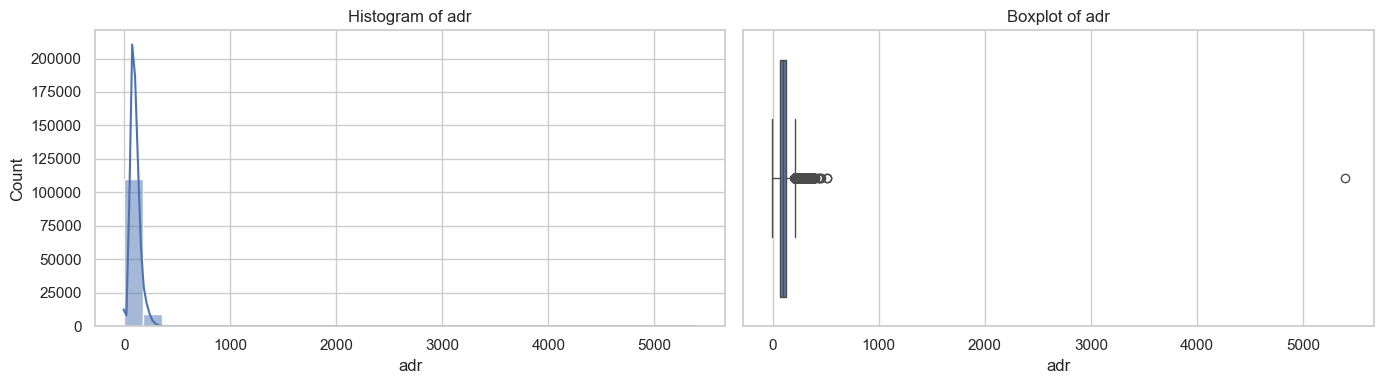

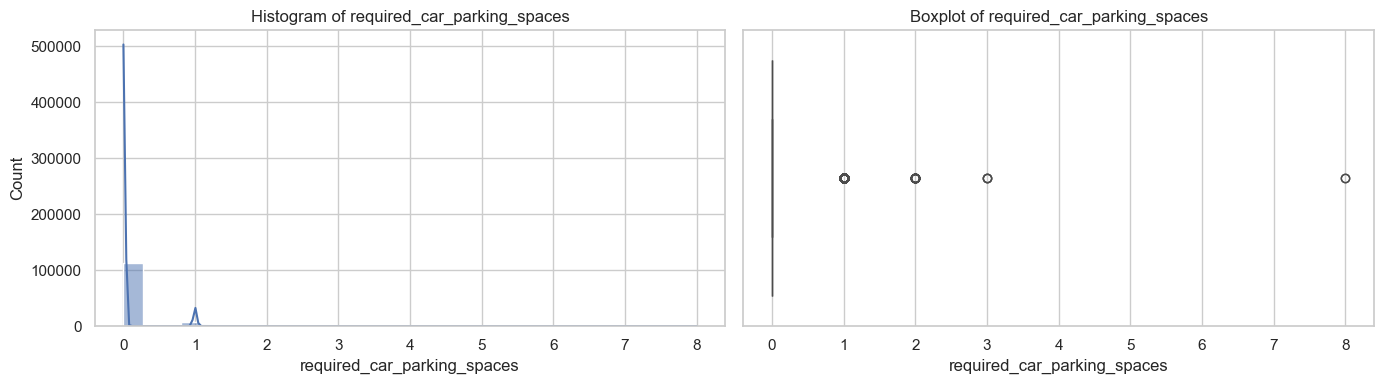

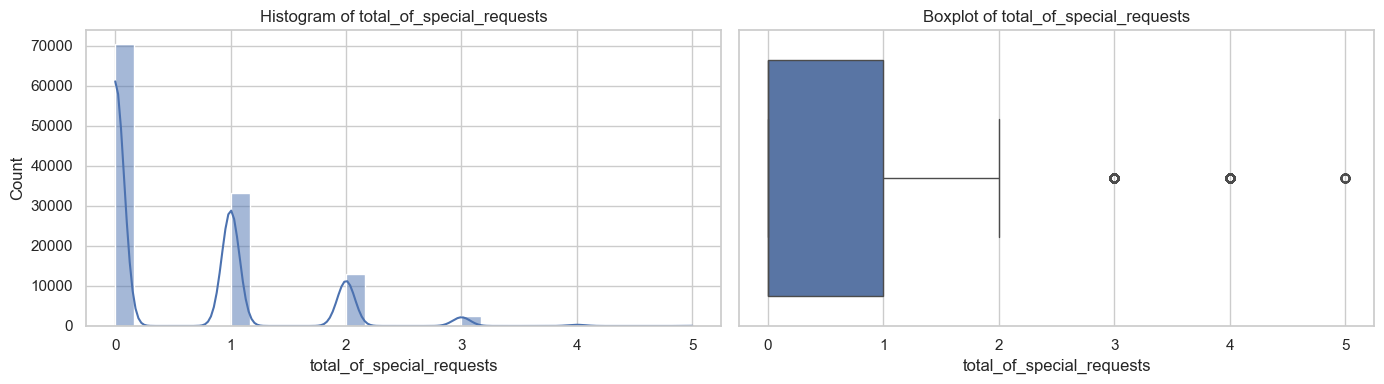

In [17]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(14, 4))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

is_canceled: 
About 37% of bookings end up being canceled. This is our target variable and indicates that cancellations are relatively common.

lead_time:
On average, bookings are made about 104 days in advance (with considerable variation), indicating guests tend to plan ahead, though some book closer to their arrival date. Also, there are some outliers indicating very high values, which shows, that some clients book for a room without any deposit (Non-Deposit is the most popular for the deposit type) and they can cancel in any time without paying a cent. This feature should be significant in prediction process

arrival_date_week_number, arrival_date_day_of_month:
The average week is around 27, and the arrival day averages around the 16th of the month. Together, these suggest that arrivals tend to cluster mid-year and mid-month.

stays_in_weekend_nights and stays_in_week_nights:
Bookings include nearly 1 weekend night and about 2.5 week nights on average, implying that most stays are relatively short—roughly 3–4 nights in total.

adults, children, babies:
The typical booking involves about 1.86 adults, with very few bookings including children (≈0.10 on average) or babies (≈0.008 on average). This suggests most reservations are made by individuals or couples without children.

is_repeated_guest:
With an average of only about 3.2%, nearly all bookings are from first-time guests.

previous_cancellations and previous_bookings_not_canceled:
Both of these are very low (means of ≈0.087 and ≈0.137, respectively), indicating that previous booking behavior (whether successful or canceled) is rare among guests.

booking_changes:
There are few modifications on average (mean ≈ 0.22), suggesting that once booked, reservations typically remain unchanged.

days_in_waiting_list:
Although the mean is around 2.32 days, many bookings seem to be confirmed without delay (median likely near 0), with a few outliers in waiting time.

adr (Average Daily Rate):
The average rate per room per day is approximately 102 (currency units). Note that there are some high outliers (with a maximum of 5400) which might merit further investigation.

required_car_parking_spaces and total_of_special_requests:
These features show very low activity (with means near 0.0625 and 0.57, respectively), indicating that few customers request parking or have special requests.



In [18]:
# Dealing with adr outlier.
outlier_rows = df_encoded[df_encoded['adr'] > 5000]
print("Number of rows with ADR > 5000:", outlier_rows.shape[0])
print("is_canceled distribution for these outlier rows:")
print(outlier_rows['is_canceled'].value_counts())

df_encoded = df_encoded[df_encoded['adr'] <= 5000].copy()  # Keep only rows with adr <= 5000

print("New dataset shape after removing ADR outliers:", df_encoded.shape)

Number of rows with ADR > 5000: 1
is_canceled distribution for these outlier rows:
is_canceled
1    1
Name: count, dtype: int64
New dataset shape after removing ADR outliers: (119389, 38)


After thorough data preprocessing, EDA, and cleaning—removing redundant columns, performing one-hot encoding for categorical variables, and eliminating outliers (e.g., rows with ADR > 5000)—our dataset is now well-prepared. We have explored key patterns and relationships, and our target variable is_canceled is clearly defined. With this foundation in place, we are ready to move on to the algorithm application stage and build predictive models to forecast booking cancellations.

In [19]:
output_path = "../data/processed/processed_hotel_booking.csv"
df_encoded.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to ../data/processed/processed_hotel_booking.csv


### Algorithm Application:


In [20]:
import sys
sys.path.append("..")
from src.model_training import train_and_evaluate_models

In [ ]:
df = pd.read_csv("../data/processed/processed_hotel_booking.csv")

X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

In [ ]:
df.shape

(119389, 38)

In [25]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Scaled numeric columns summary:")
print(X[numeric_cols].describe())

Scaled numeric columns summary:
          lead_time  arrival_date_week_number  arrival_date_day_of_month  \
count  1.193890e+05              1.193890e+05               1.193890e+05   
mean  -4.380298e-17             -7.046567e-17               1.018896e-16   
std    1.000004e+00              1.000004e+00               1.000004e+00   
min   -9.733217e-01             -1.923201e+00              -1.685289e+00   
25%   -8.048816e-01             -8.206710e-01              -8.880938e-01   
50%   -3.276347e-01              6.135272e-02               2.298609e-02   
75%    5.239236e-01              7.963725e-01               8.201810e-01   
max    5.923365e+00              1.898902e+00               1.731261e+00   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             1.193890e+05          1.193890e+05  1.193890e+05   
mean              7.189403e-17         -4.237463e-17 -1.685463e-16   
std               1.000004e+00          1.000004e+00  1.000004e+00   
min


Training and evaluating model: Logistic Regression
--- Logistic Regression Evaluation Metrics ---
Accuracy:  0.7912
Precision: 0.8686
Recall:    0.5244
F1 Score:  0.6540
AUC-ROC:   0.8426


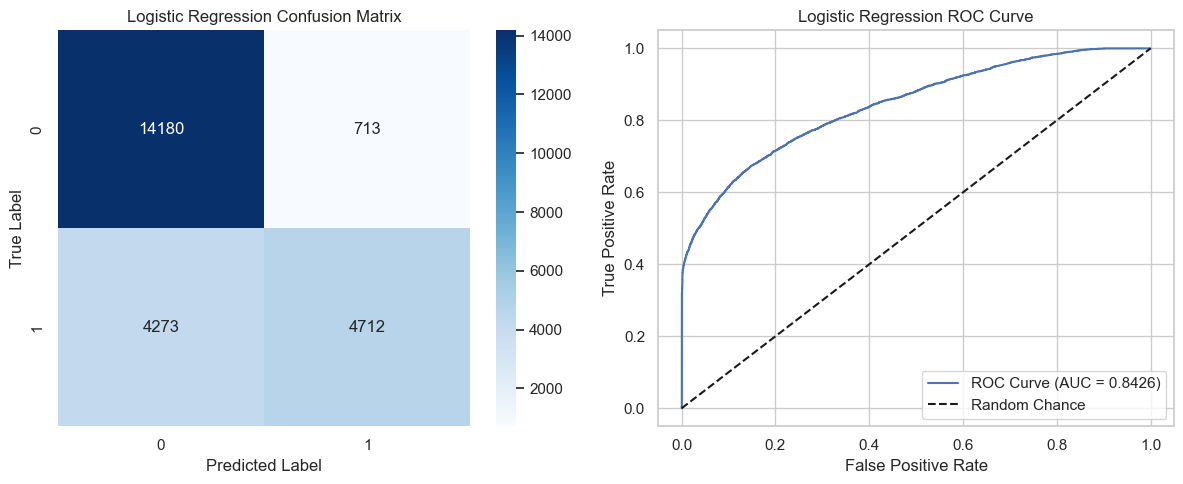


Training and evaluating model: Decision Tree
--- Decision Tree Evaluation Metrics ---
Accuracy:  0.8116
Precision: 0.7462
Recall:    0.7566
F1 Score:  0.7514
AUC-ROC:   0.8039


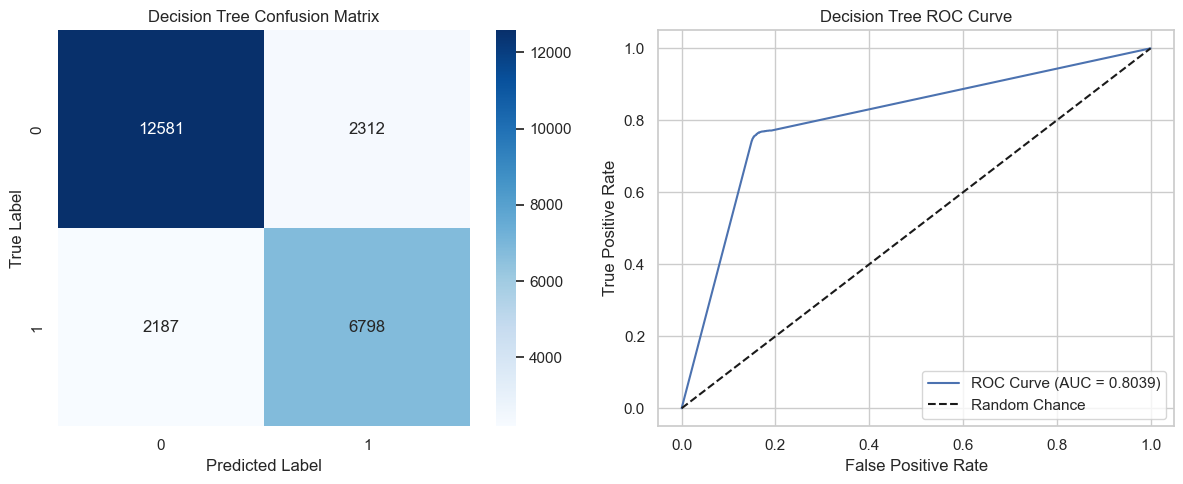


Training and evaluating model: Random Forest
--- Random Forest Evaluation Metrics ---
Accuracy:  0.8574
Precision: 0.8640
Recall:    0.7369
F1 Score:  0.7954
AUC-ROC:   0.9250


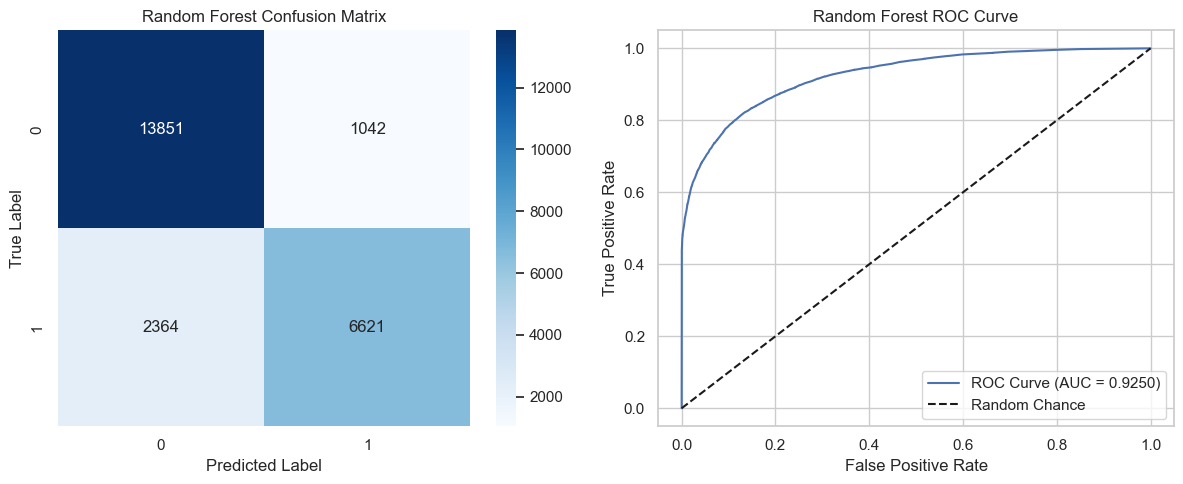


Training and evaluating model: Gradient Boosting
--- Gradient Boosting Evaluation Metrics ---
Accuracy:  0.8027
Precision: 0.8623
Recall:    0.5662
F1 Score:  0.6836
AUC-ROC:   0.8701


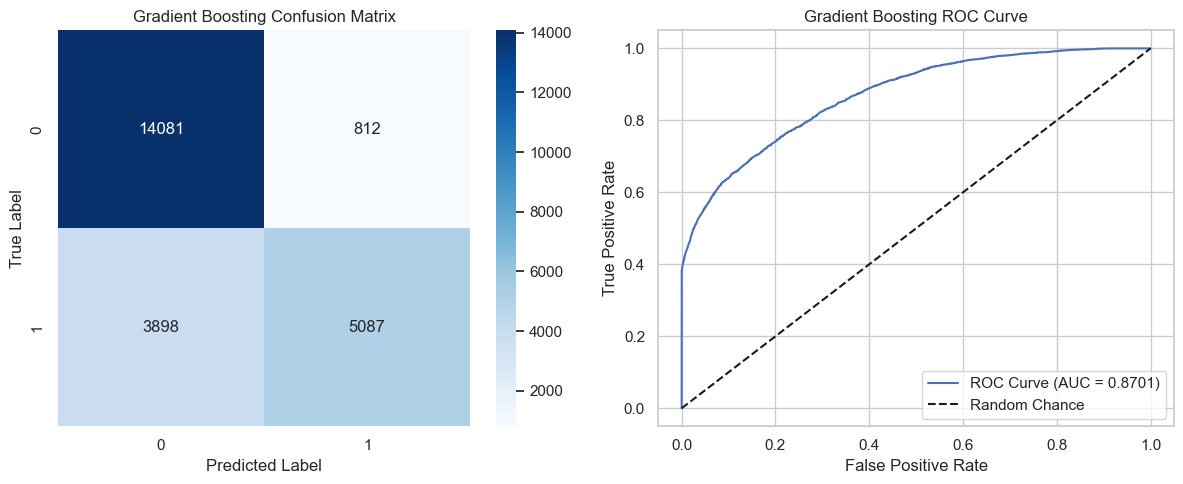


Training and evaluating model: AdaBoost
--- AdaBoost Evaluation Metrics ---
Accuracy:  0.7989
Precision: 0.8292
Recall:    0.5863
F1 Score:  0.6869
AUC-ROC:   0.8602


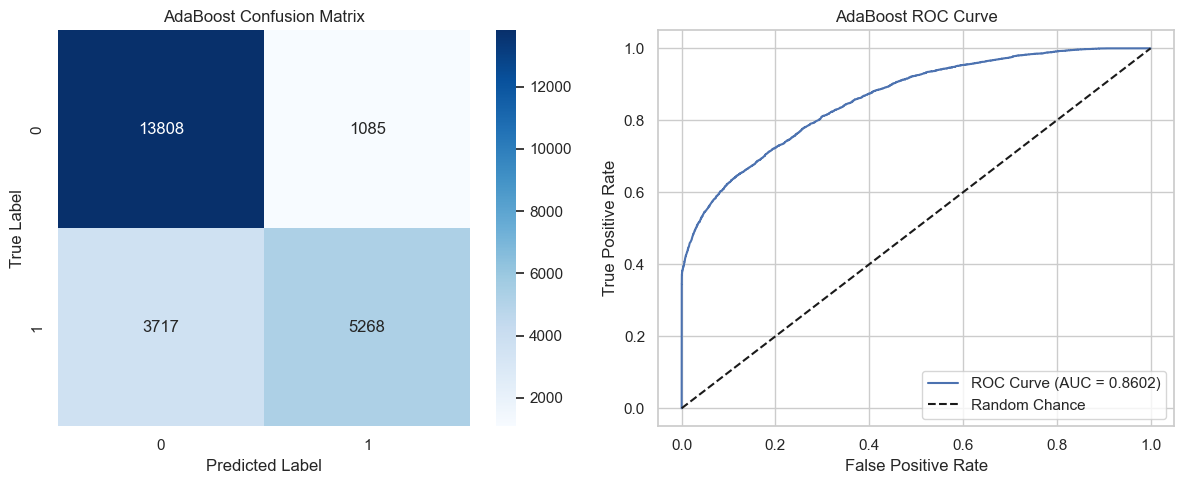


Training and evaluating model: XGBoost
--- XGBoost Evaluation Metrics ---
Accuracy:  0.8279
Precision: 0.8488
Recall:    0.6603
F1 Score:  0.7428
AUC-ROC:   0.9025


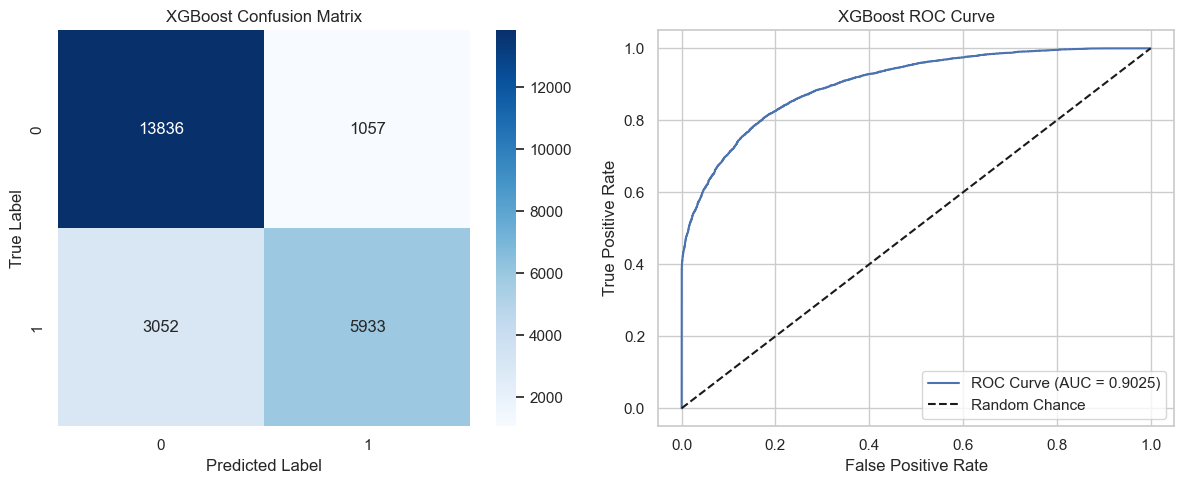


Training and evaluating model: K-Nearest Neighbors
--- K-Nearest Neighbors Evaluation Metrics ---
Accuracy:  0.8061
Precision: 0.7773
Recall:    0.6795
F1 Score:  0.7251
AUC-ROC:   0.8631


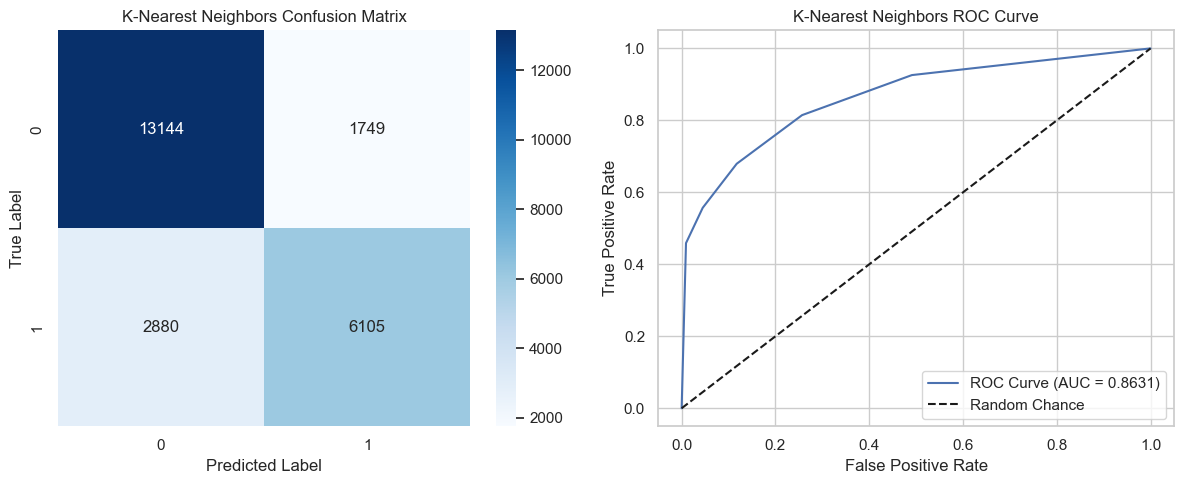


Training and evaluating model: Naive Bayes
--- Naive Bayes Evaluation Metrics ---
Accuracy:  0.5628
Precision: 0.4595
Recall:    0.9174
F1 Score:  0.6123
AUC-ROC:   0.8025


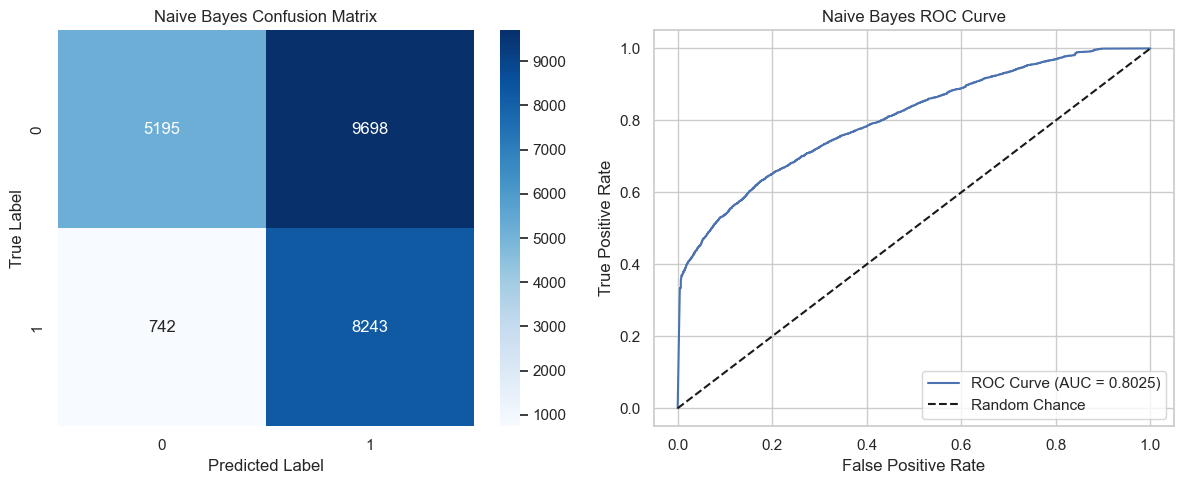


Training and evaluating model: Bagging - Decision Tree


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


--- Bagging - Decision Tree Evaluation Metrics ---
Accuracy:  0.8543
Precision: 0.8466
Recall:    0.7486
F1 Score:  0.7946
AUC-ROC:   0.9198


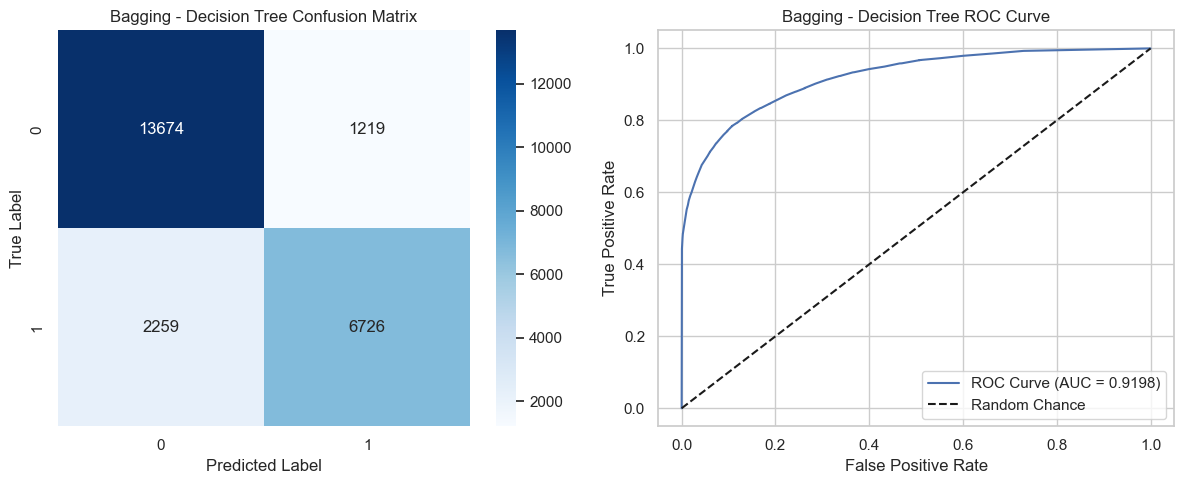


Comparative Accuracy Results:
Logistic Regression: Accuracy = 0.7912
Decision Tree: Accuracy = 0.8116
Random Forest: Accuracy = 0.8574
Gradient Boosting: Accuracy = 0.8027
AdaBoost: Accuracy = 0.7989
XGBoost: Accuracy = 0.8279
K-Nearest Neighbors: Accuracy = 0.8061
Naive Bayes: Accuracy = 0.5628
Bagging - Decision Tree: Accuracy = 0.8543


In [26]:
model_results = train_and_evaluate_models(X, y)

print("\nComparative Accuracy Results:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}")

### Model Selection:

- Model Summaries and Brief Explanations

Logistic Regression:
A linear model that estimates the probability of cancellation by fitting a logistic function to a linear combination of features. It achieved good precision (0.8686) but relatively low recall (0.5244), with an AUC-ROC of 0.8426 — suggesting it’s conservative in predicting cancellations.

Decision Tree:
This tree-based model splits data recursively based on feature values. It shows balanced performance with an accuracy of 0.8116 and an F1-score of 0.7514; however, its AUC-ROC is only 0.8039, indicating it is less robust when comparing trade-offs between true and false positives.

Random Forest:
An ensemble technique that builds multiple decision trees on bootstrapped samples and aggregates their outputs. It achieved the highest overall performance with an accuracy of 0.8574, an F1-score of 0.7954, and an excellent AUC-ROC of 0.9250. Its ensemble nature reduces overfitting and improves generalization, making it a strong candidate.

Gradient Boosting:
This method builds trees sequentially, where each tree attempts to correct the errors of the previous ones. It produced a decent AUC-ROC of 0.8701 but had a lower recall (0.5662), resulting in an F1-score of 0.6836.

AdaBoost:
Another boosting method that iteratively adjusts the weights of training instances, focusing on mistakes. Its performance is similar to Gradient Boosting with an AUC-ROC of 0.8602, but overall metrics remain slightly lower than our top performers.

XGBoost:
A high-performance gradient boosting framework designed for speed and performance. It achieved an AUC-ROC of 0.9025 with balanced metrics, though not quite matching the Random Forest’s performance.

K-Nearest Neighbors (KNN):
A non-parametric method that predicts cancellation based on the labels of the closest neighbors. It performed moderately (AUC-ROC of 0.8631) but is often sensitive to the choice of k and the scale of features.

Naive Bayes:
Based on Bayes’ theorem with a strong assumption of feature independence, it achieved a high recall (0.9174) but very low accuracy (0.5628) and precision (0.4595), leading to an overall unsatisfactory performance with an AUC-ROC of 0.8025.

Bagging - Decision Tree:
Uses bootstrapping and aggregation on decision trees. It delivered competitive performance with an accuracy of 0.8543 and an AUC-ROC of 0.9198, slightly lower than Random Forest.

- Model Selection

Based on our comparative analysis, the Random Forest model stands out as the best-performing algorithm. Its combination of high accuracy (0.8574), excellent AUC-ROC (0.9250), 2nd best precision (0.8640) just a little lower than best precision and good recall (0.7369), which is much lower than Naive Bayes's recall, though its other metrics are much worse, and a robust F1-score (0.7954) makes it the most reliable option for predicting cancellations. Random Forest's ensemble approach effectively reduces variance and is less prone to overfitting than a single decision tree, while handling the complexity of the dataset better than simpler linear models such as Logistic Regression.

Thus, Random Forest is recommended for further development and deployment, as its empirical performance indicates superior discrimination between canceled and non-canceled bookings, which is crucial for informed revenue management decisions.

### Hyperparameter Tuning:


In [31]:
from sklearn.ensemble import RandomForestClassifier
from src.model_evaluation import evaluate_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=4, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

if hasattr(best_rf, "predict_proba"):
    y_prob = best_rf.predict_proba(X_test)[:, 1]
else:
    y_prob = best_rf.decision_function(X_test)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy Score: 0.852687102850864


--- Tuned Random Forest Evaluation Metrics ---
Accuracy:  0.8564
Precision: 0.8765
Recall:    0.7198
F1 Score:  0.7904
AUC-ROC:   0.9254


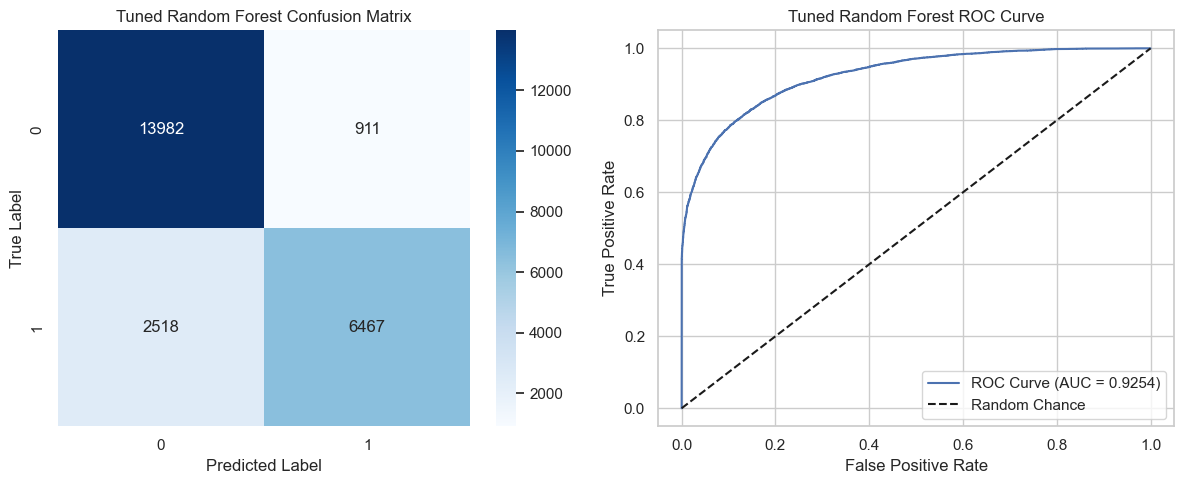

In [32]:
evaluate_model(y_test, y_pred, y_prob, model_name="Tuned Random Forest")

While the hyperparameter tuning led to some marginal changes, in particular, a slight increase in precision and AUC-ROC, the overall performance of the tuned model remains very similar to the untuned Random Forest. Depending on the business context, if a higher precision is more desirable (to minimize false alarms in predicting cancellations), the tuned model may be preferred. Otherwise, the minimal differences might suggest that the untuned model already provided robust performance on the dataset.



### Conclusion:

We successfully built and evaluated a predictive model for hotel booking cancellations using several machine learning algorithms. Our data underwent extensive preprocessing, exploratory analysis, and feature engineering, which laid the foundation for model training and evaluation using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

Ensemble methods, particularly the Random Forest model, emerged as the best performer with balanced metrics and high discriminative ability. However, while the tuned Random Forest model achieved strong results (accuracy ~85.7% and AUC-ROC ~92.5%), these scores are not perfect. This suggests that there is room for improvement—potentially by incorporating additional or more informative features that capture underlying patterns in the booking behavior.

In summary, although our tuned Random Forest model is robust and effective for predicting cancellations, further feature exploration and engineering could enhance performance even more, paving the way for better-informed revenue management decisions.

